In [1]:
import pandas as pd

dados = pd.read_csv('CSV_Anfibios_Cortada.csv')
dados.head()

,Mes,Estacao,Trecho,Sentido,Trecho macro,Tipo De Pistas,Numero de Pistas,Tipo de Pavimento,Numero de Faixas,Velocidade Maxima,...,Agua?,Vegetacao Baixa?,capimAlto,Arbustos,Floresta,Local,Com filhotes?,Faixa Horario da Coleta,Faixa de Quilometragem,anfibio mais atropelado?
0,4,Outono,2,JF,Baixada,Sem divisão,1,Pavimento flexível (asfalto),4,110,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 00 e 06,Entre 100 e 125,0
1,4,Outono,4,JF,Serra,Sem divisão,1,Pavimento rígido,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 06 e 12,Entre 75 e 100,0
2,5,Outono,5,JF,Serra,Sem divisão,1,Pavimento semi-flexível,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Entre 12 e 18,Entre 75 e 100,0
3,6,Outono,7,RJ,Planalto,Defensa Metálica,2,Pavimento flexível (asfalto),4,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acostamento,Desconhecido,Entre 06 e 12,Entre 50 e 75,0
4,6,Outono,3,RJ,Serra,Defensa Metálica,2,Pavimento flexível (asfalto),4,80,...,não,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acesso/ Retorno,Desconhecido,Entre 12 e 18,Entre 100 e 125,0


In [2]:
Y_df = dados['anfibio mais atropelado?']  
X_df = dados[[ "Estacao", 
              "Trecho", "Sentido", "Trecho macro",
              "Tipo De Pistas", "Numero de Pistas",
              "Tipo de Pavimento", "Numero de Faixas",
              "Velocidade Maxima", "Tipo da Chuva","Intervencao",
              "Vazamento", "Agua?", "Vegetacao Baixa?","capimAlto",
              "Arbustos","Floresta","Local","Com filhotes?",
              "Faixa Horario da Coleta","Faixa de Quilometragem"]]

In [3]:
# Xdummies_df = pd.get_dummies(X_df)
# Xdummies_df.head()

# x = Xdummies_df.values
# y = Y_df.values 

from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder


X_encoded = X_df.apply(LabelEncoder().fit_transform)
X = X_encoded.values
print("x:", X.shape)

atributos = []
for i in X_df:
    atributos.append(i)
    

x: (13096, 21)


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y_df, test_size = 0.33,
                                                         stratify = Y_df)

print(treino_x)

[[ 2  3  0 ...  0  2  4]
 [ 2 10  0 ...  1  1  0]
 [ 0 17  0 ...  1  1  6]
 ...
 [ 3  5  1 ...  0  0  3]
 [ 2 12  0 ...  1  1  8]
 [ 2  6  1 ...  0  0  3]]


In [5]:
from sklearn.naive_bayes import CategoricalNB

Categorical = CategoricalNB (class_prior=None)

Categorical.fit(treino_x, treino_y)
    
# testa modelo
y_predict = Categorical.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
y_true = teste_y


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4262
           1       0.18      0.13      0.15        60

    accuracy                           0.98      4322
   macro avg       0.58      0.56      0.57      4322
weighted avg       0.98      0.98      0.98      4322

Matriz de confusão


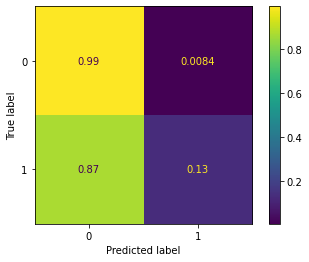

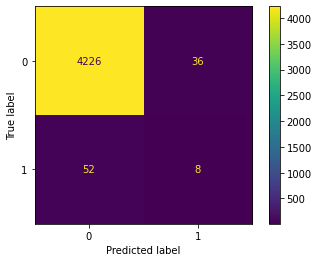

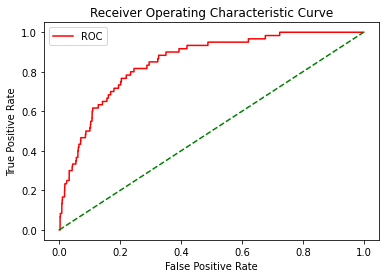

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(teste_y, y_predict))

print("Matriz de confusão")
matriz_confusaoPorc = confusion_matrix(y_true, y_predict, normalize = 'true')
matrizPorc = ConfusionMatrixDisplay(matriz_confusaoPorc)
matrizPorc.plot()

matriz_confusao = confusion_matrix(y_true, y_predict)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
from sklearn.metrics import roc_curve

TargetVarScore = Categorical.predict_proba(teste_x)
fper, tper, thresholds = roc_curve(teste_y, TargetVarScore[:, 1])
plot_roc_curve(fper, tper)

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      4262
           1       0.04      0.72      0.08        60

    accuracy                           0.77      4322
   macro avg       0.52      0.75      0.48      4322
weighted avg       0.98      0.77      0.86      4322

Matriz de confusão


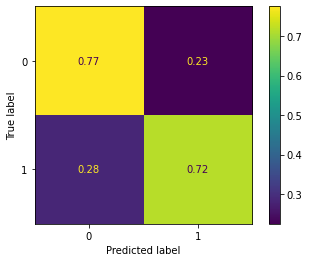

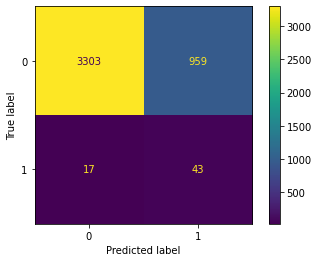

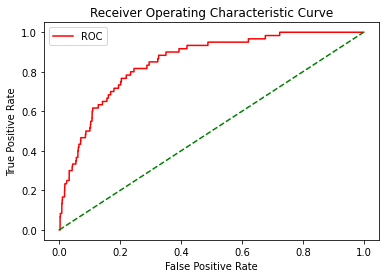

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(treino_x, treino_y)

# print("Antes do balanceamento, contagem de '1': {}".format(sum(treino_y == 1)))
# print("Antes do balanceamento, contagem de '0': {} \n".format(sum(treino_y == 0)))

# print('Depois do balanceamento, dimensão de treino_X: {}'.format(X_res.shape))
# print('Depois do balanceamento, dimensão de treino_y: {} \n'.format(y_res.shape))
  
# print("Depois do balanceamento, contagem de '1': {}".format(sum(y_res == 1)))
# print("Depois do balanceamento, contagem de '0': {}".format(sum(y_res == 0)))

CategoricalBalanced = CategoricalNB()

# treina o modelo com os dados balanceados
CategoricalBalanced.fit(X_res, y_res )

# testa model
y_predict = CategoricalBalanced.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
y_true = teste_y

print(classification_report(teste_y, y_predict))

print("Matriz de confusão")
matriz_confusaoPorc = confusion_matrix(y_true, y_predict, normalize = 'true')
matrizPorc = ConfusionMatrixDisplay(matriz_confusaoPorc)
matrizPorc.plot()

matriz_confusao = confusion_matrix(y_true, y_predict)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

from sklearn.metrics import roc_curve

TargetVarScore = Categorical.predict_proba(teste_x)
fper, tper, thresholds = roc_curve(y_true, TargetVarScore[:, 1])
plot_roc_curve(fper, tper)


In [8]:
y_prob = Categorical.feature_log_prob_
# print(y_prob)



1. Tipo da Chuva (0.001018)
2. Agua? (0.000879)
3. Tipo de Pavimento (0.000602)
4. Sentido (0.000555)
5. capimAlto (0.000509)
6. Local (0.000370)
7. Intervencao (0.000324)
8. Arbustos (0.000278)
9. Vazamento (0.000139)
10. Faixa Horario da Coleta (0.000139)
11. Com filhotes? (0.000046)
12. Estacao (0.000000)
13. Vegetacao Baixa? (-0.000093)
14. Tipo De Pistas (-0.000278)
15. Velocidade Maxima (-0.000370)
16. Numero de Faixas (-0.000602)
17. Numero de Pistas (-0.000925)
18. Trecho macro (-0.001388)
19. Trecho (-0.001527)
20. Floresta (-0.001620)
21. Faixa de Quilometragem (-0.001805)


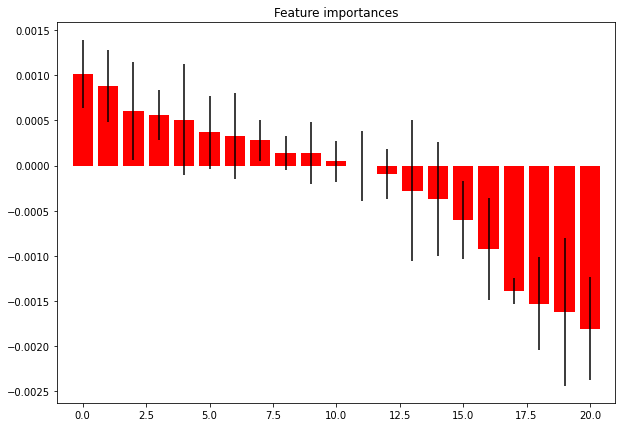

Matriz de correlação:


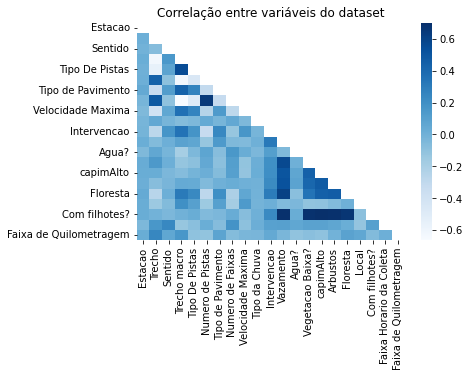

In [9]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(Categorical, teste_x, teste_y)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

for f in range(teste_x.shape[1]):
    print("%d. %s (%f)" % (f + 1, atributos[indices[f]], importances[indices[f]]))
    
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(teste_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(teste_x.shape[1]), [features[indices[i]] for i in range(6)])
plt.xlim([-1, teste_x.shape[1]])
plt.show()


print("Matriz de correlação:")
mask = np.triu(np.ones_like(X_encoded.corr()))
sns.heatmap(X_encoded.corr(),
            mask=mask,
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()


In [10]:
from sklearn.feature_selection import SelectKBest, chi2

sel_chi2 = SelectKBest(chi2, k=10)    # seleciona 10 features
X_train_chi2 = sel_chi2.fit_transform(X, Y_df)
# print(sel_chi2.get_support(indices=True))

print("os atributos escolhidos foram:")
for j in sel_chi2.get_support(indices=True):
    print(atributos[j])
        

# print(X_train_chi2.shape)

novoDf = pd.DataFrame(X_train_chi2, Y_df).reset_index()
novoDf.columns = ['target', 0,1,2,3,4,5,6,7,8,9]

novoX = novoDf[[0,1,2,3,4,5,6,7,8,9]]
novoY = novoDf["target"]


os atributos escolhidos foram:
Estacao
Trecho
Sentido
Trecho macro
Tipo De Pistas
Numero de Pistas
Numero de Faixas
Velocidade Maxima
Local
Faixa de Quilometragem


x: (13096, 10)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4262
           1       0.00      0.00      0.00        60

    accuracy                           0.98      4322
   macro avg       0.49      0.50      0.50      4322
weighted avg       0.97      0.98      0.98      4322

Matriz de confusão


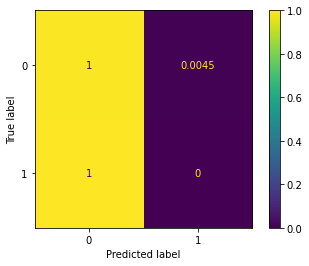

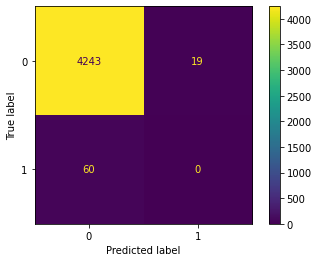

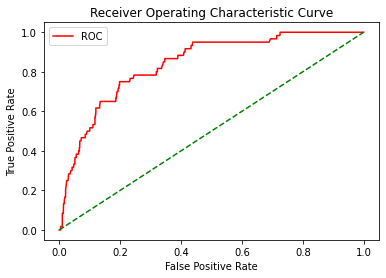

In [11]:
# X_novo = dados[["Tipo da Chuva", "Agua?", "Tipo de Pavimento", "Sentido",
#                 "Trecho macro", "Trecho", "Floresta", "Faixa de Quilometragem"]]

X_encoded = novoX.apply(LabelEncoder().fit_transform)
X = X_encoded.values
print("x:", X.shape)

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y_df, test_size = 0.33,
                                                         stratify = Y_df)

Categorical = CategoricalNB (class_prior=None)

Categorical.fit(treino_x, treino_y)
    
# testa modelo
y_predict = Categorical.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
y_true = teste_y

print(classification_report(teste_y, y_predict))

print("Matriz de confusão")
matriz_confusaoPorc = confusion_matrix(y_true, y_predict, normalize = 'true')
matrizPorc = ConfusionMatrixDisplay(matriz_confusaoPorc)
matrizPorc.plot()

matriz_confusao = confusion_matrix(y_true, y_predict)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
from sklearn.metrics import roc_curve

TargetVarScore = Categorical.predict_proba(teste_x)
fper, tper, thresholds = roc_curve(teste_y, TargetVarScore[:, 1])
plot_roc_curve(fper, tper)